# Volatility 評価

### プロジェクトのルートのパスを通す

In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

### ライブラリを一括インポート

In [2]:
import os
import re

import matplotlib.dates as mdates
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import griddata

from funcs.ios import get_excel_sheet
from funcs.technical import MovingRange, CappedPriceMovement
from funcs.tide import conv_datetime_from_timestamp

### Matplotlib のフォント設定（オプション）

In [3]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()

## ティックデータの取得

In [4]:
excel = "ticks_20251229.xlsx"
code = "7011"  # 銘柄コード

path_dir = os.path.join("..", "collection")
path_excel = os.path.join(path_dir, excel)
df = get_excel_sheet(path_excel, code)
df

,Time,Price,Volume
0,1.766966e+09,3859,371800
1,1.766966e+09,3859,371800
2,1.766966e+09,3858,503100
3,1.766966e+09,3858,503100
4,1.766966e+09,3860,517200
...,...,...,...
19422,1.766989e+09,3871,10461200
19423,1.766989e+09,3871,10461200
19424,1.766989e+09,3871,10461400
19425,1.766989e+09,3871,10461400


In [5]:
df.index = [pd.to_datetime(conv_datetime_from_timestamp(ts)) for ts in df["Time"]]
df

,Time,Price,Volume
2025-12-29 09:00:04,1.766966e+09,3859,371800
2025-12-29 09:00:05,1.766966e+09,3859,371800
2025-12-29 09:00:06,1.766966e+09,3858,503100
2025-12-29 09:00:07,1.766966e+09,3858,503100
2025-12-29 09:00:08,1.766966e+09,3860,517200
...,...,...,...
2025-12-29 15:24:45,1.766989e+09,3871,10461200
2025-12-29 15:24:46,1.766989e+09,3871,10461200
2025-12-29 15:24:47,1.766989e+09,3871,10461400
2025-12-29 15:24:48,1.766989e+09,3871,10461400


In [6]:
period_mr = 30
mr = MovingRange(period_mr)
cpm = CappedPriceMovement(period_mr)

list_mr = list()
for price in df["Price"]:
    list_mr.append(mr.update(price))
df["MR"] = list_mr

list_cpm = list()
for price in df["Price"]:
    list_cpm.append(cpm.update(price))
df["CPM"] = list_cpm

df

,Time,Price,Volume,MR,CPM
2025-12-29 09:00:04,1.766966e+09,3859,371800,0,0.0
2025-12-29 09:00:05,1.766966e+09,3859,371800,0,0.0
2025-12-29 09:00:06,1.766966e+09,3858,503100,1,1.0
2025-12-29 09:00:07,1.766966e+09,3858,503100,1,1.0
2025-12-29 09:00:08,1.766966e+09,3860,517200,2,2.0
...,...,...,...,...,...
2025-12-29 15:24:45,1.766989e+09,3871,10461200,4,11.0
2025-12-29 15:24:46,1.766989e+09,3871,10461200,4,11.0
2025-12-29 15:24:47,1.766989e+09,3871,10461400,4,10.0
2025-12-29 15:24:48,1.766989e+09,3871,10461400,4,10.0


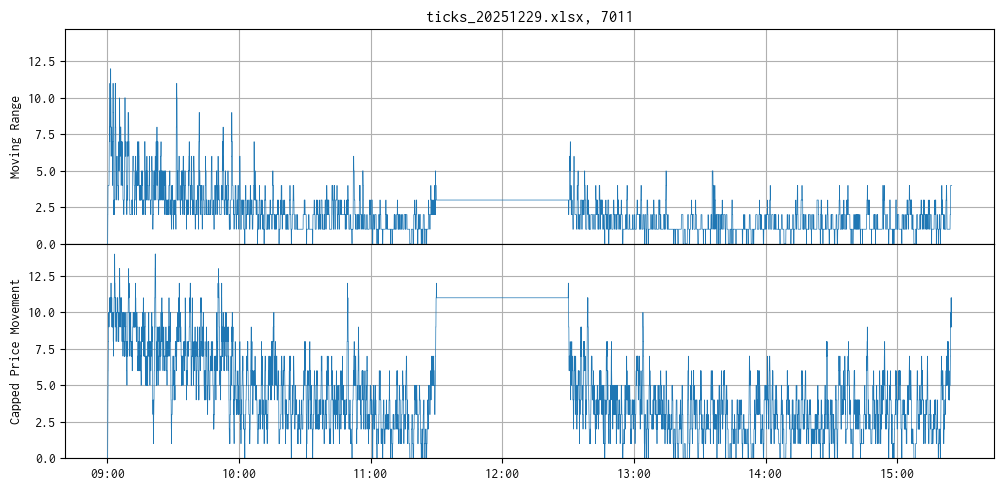

In [7]:
fig = plt.figure(figsize=(10, 5))
n = 2
ax = dict()
gs = fig.add_gridspec(n, 1, wspace=0.0, hspace=0.0, height_ratios=[1 for i in range(n)])
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

ax[0].plot(df["MR"], linewidth=0.5)
ax[0].set_ylabel("Moving Range")

ax[1].plot(df["CPM"], linewidth=0.5)
ax[1].set_ylabel("Capped Price Movement")

y_max = max(ax[0].get_ylim()[1], ax[1].get_ylim()[1])
ax[0].set_ylim(0, y_max)
ax[1].set_ylim(0, y_max)

plt.tight_layout()
output = os.path.join(
    "..", "tmp", "mr_cpm.png"
)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax[0].set_title(f"{excel}, {code}")
plt.tight_layout()
plt.savefig(output)
plt.show()